In [1]:
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb.camb import csf_background
from camb.constants import Mpc, const_pi, G, m_p, eV, hbar

In [2]:

#### 宇宙学参数
H0 = 67.5                 # Hubble 率
omk = 0                   # 空间曲率
ombh2 = 0.022             # 重子物质
omdmh2 = 0.122            # 暗物质

##### 暗物质
######## CSF 参数
m_phi = 1e-27             # 粒子质量，单位 eV
Num_density = 10**(21)          # 粒子数密度， 单位 m^(-3)
omphih2 = 0.056             # 密度分数
dotR = 10**(-22.20033)*(eV)**(1/2)               # CSF 的径向速度，单位 eV^(1/2)
a_ini = 1e-10


######## CDM
omch2 = omdmh2 - omphih2  # CDM

##### 有质量中微子
mnu = 0.06               # 中微子质量， eV


##### 再电离
tau = 0.06               # 再电离光深


##### 宇宙初始条件
As = 2e-9                # 标量功率谱振幅
ns = 0.965               # 标量谱指数

##### 非线性

halofit_version = 'mead'

##### CMB
lmax = 3000

#### CAMB 参数设置
pars = camb.set_params(H0 = H0, ombh2 = ombh2, omch2 = omch2, mnu = mnu, omk = omk, tau = tau,
                       As = As, ns = ns, halofit_version = halofit_version, lmax = lmax,
                       m_phi = m_phi, Num_density = Num_density, omphih2 = omphih2, dotR = dotR, a_ini = a_ini)


In [3]:

csf_background(pars, get_phi=True)

pars.WantScalars = True
pars.WantTensors = False

CSFData = pars.DarkMatter

a_osc = CSFData.a_osc
a_wkb = CSFData.a_wkb


In [4]:

data= camb.get_background(pars)




In [5]:
eta = 10**(np.linspace(0, 4, 1000))
y = 10**(-2)*eta**2
ks = 0.5
ev = data.get_time_evolution(ks, eta)
ev = np.array(ev)

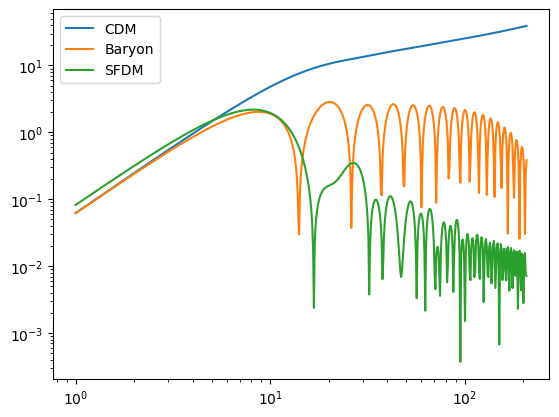

In [6]:

plt.plot(eta,abs(ev[:,1]),label ='CDM')
plt.plot(eta,abs(ev[:,2]),label = 'Baryon')
plt.plot(eta,abs(ev[:,4]),label = 'SFDM')
# plt.plot(eta,y)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()


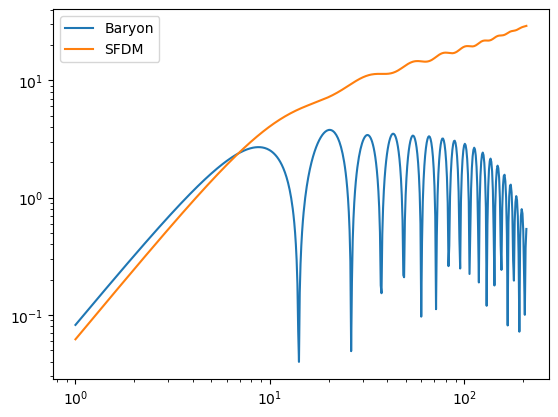

In [7]:

plt.plot(eta,abs(ev[:,3]),label = 'Baryon')
plt.plot(eta,abs(ev[:,7]),label = 'SFDM')
# plt.plot(eta,y)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()